<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [1]:
import numpy as np

In [2]:
print(np.float32(12.123452) - np.float32(12.123450))
diff= np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002

error= abs(diff- valor_real)/(valor_real)*100

#como entre dos numero grandes muy parecidos pueden haber errores tan grandes



print(error)
#(12.123452/valor_real)*1/(2**31)

1.9073486e-06
4.632568359374996


In [3]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [4]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [5]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [6]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [7]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [8]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def exponencial(x,N):
  exp = 0
  for i in range(N):
    exp += (-1)**(i)*x**(i)/factorial((i))
  return exp

#ejemplo

x=10
N=100
e1= exponencial(x,N)
e_exacto= np.exp(-x)
print(e1,e_exacto)




4.5399929433607724e-05 4.5399929762484854e-05


In [10]:
def exponencial_truncado(x,N):
  ex = exponencial(x,N)
  tresh = abs(1e-7*ex)
  exp_=0
  for i in range(N):
    exp_ = abs((-x)**(i+1)/factorial(i+1))
    if exp_ <= tresh:
      break
  exp= exponencial(x,i)
  return exp, i

In [11]:
x=10
N=100
exacto= np.exp(-x)

print( f'Valor de la serie: {exponencial(x,N)}')
print( f'Valor de la serie truncada: {exponencial_truncado(x,N)}')
print( f'Valor exacto: {exacto}')

Valor de la serie: 4.5399929433607724e-05
Valor de la serie truncada: (4.5399936295743496e-05, 45)
Valor exacto: 4.5399929762484854e-05


In [12]:
def invertida(x,N):
  exp= 0
  for i in range(N):
    exp +=x**i/factorial(i)
  return 1/exp



In [13]:
x=10
N=10
exacto= np.exp(-x)

print( f'Valor de la serie: {exponencial(x,N)}')
print( f'Valor de la serie invertida: {invertida(x,N)}')
print( f'Valor exacto: {exacto}')

Valor de la serie: -1413.1446208112875
Valor de la serie invertida: 9.914169866623816e-05
Valor exacto: 4.5399929762484854e-05


In [14]:
#n=100

N= np.arange(1,100,1)

exp1_ = np.zeros(len(N))
exp2_ = np.zeros(len(N))

for i, n in enumerate(N):
  exp1_[i] = exponencial(x,n)
  exp2_[i] = invertida(x,n)



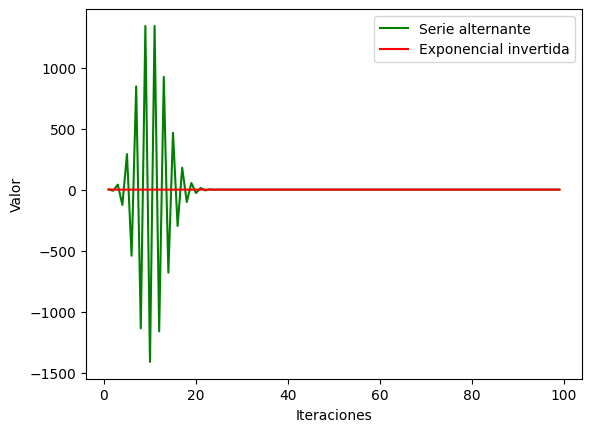

In [15]:
plt.figure()
plt.plot(N,exp1_, "g-", label= "Serie alternante")
plt.plot(N,exp2_, "r-", label= "Exponencial invertida")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Valor")
plt.show()

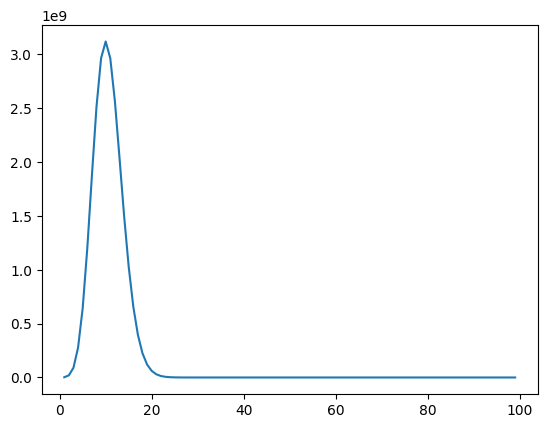

In [16]:
x=10
exacto= np.exp(-x)
error =abs( exp1_- exacto)/exacto*100
plt.plot(N,error)








## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




Primera serie

\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

In [26]:
# (SEgundo) cuando la diferencia entre consecutivos sea menor que 10**-7 entonces break.
def Sn_1(N):
  sn=0
  N= 2 * N
  for i in range(N+1):
    sn+= ((-1)**i)*(i/(i+1))
  return sn

#N=100
#print(Sn_1(N))


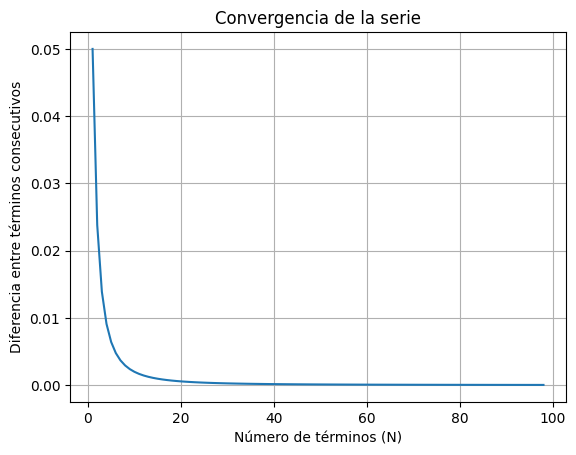


 Si la grafica tiende a cero a medida que aumenta el N, entonces sugiere que la serie converge 


In [39]:
import numpy as np
import matplotlib.pyplot as plt



N_terminos = np.arange(1, 100)
terminos = np.array([Sn_1(n) for n in N_terminos])

diferencia = np.abs(np.diff(terminos))  #diff hace la diferencia entre terminos consecutivos

#print(len(N_terminos))         como el tamaño es distinto entonces hay que quuitarle un elemento a terminos
#print(len(diferencia))
#print(N_terminos, N_terminos[:-1])

plt.plot(N_terminos[:-1], diferencia)
plt.xlabel("Número de términos (N)")
plt.ylabel("Diferencia entre términos consecutivos")
plt.title("Convergencia de la serie")
plt.grid()
plt.show()

print("\n Si la grafica tiende a cero a medida que aumenta el N, entonces sugiere que la serie converge ")


Segunda Serie

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

In [40]:
def Sn_2(N):
  sn=0
  par=0
  impar=0
  for i in range(1,N):
    par+= - ((2*i)-1)/(2*i)
    impar+= (2*i)/((2*i)+1)
  sn= impar+par
  return sn

#N=100
#Sn_2(N)

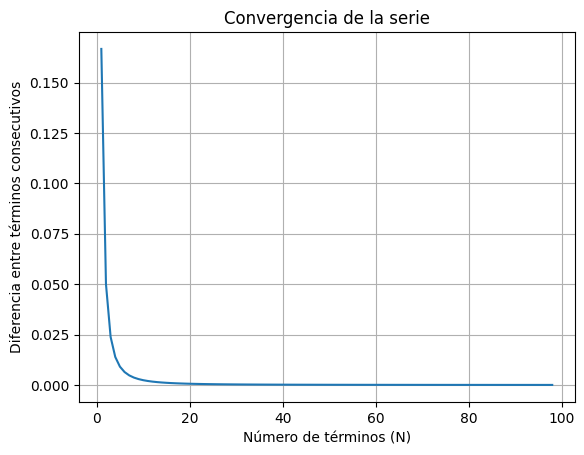


 Si la grafica tiende a cero a medida que aumenta el N, entonces sugiere que la serie converge 


In [43]:

N_terminos = np.arange(1, 100)
terminos = np.array([Sn_2(n) for n in N_terminos])

diferencia = np.abs(np.diff(terminos))  #diferencia entre terminos consecutivos

plt.plot(N_terminos[:-1], diferencia)
plt.xlabel("Número de términos (N)")
plt.ylabel("Diferencia entre términos consecutivos")
plt.title("Convergencia de la serie")
plt.grid()
plt.show()
print("\n Si la grafica tiende a cero a medida que aumenta el N, entonces sugiere que la serie converge ")

Tercera Serie

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}

In [45]:
def Sn_3(N):
  sn=0
  for i in range(1,N):
    sn+= 1/(2*i*((2*i)+1))
  return sn

#N=100
#Sn_3(N)

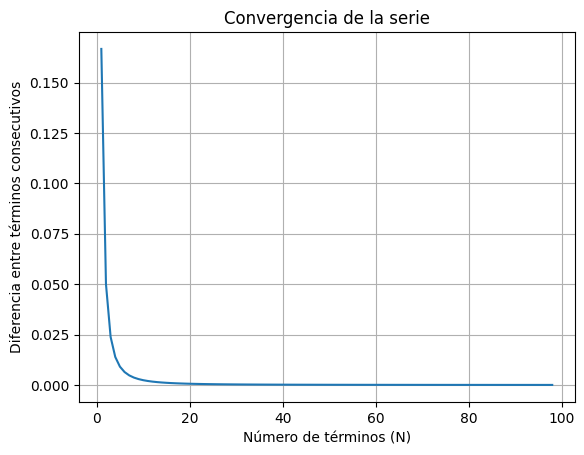


 Si la grafica tiende a cero a medida que aumenta el N, entonces sugiere que la serie converge 


In [46]:

N_terminos = np.arange(1, 100)
terminos = np.array([Sn_3(n) for n in N_terminos])

diferencia = np.abs(np.diff(terminos))  #diferencia entre terminos consecutivos

plt.plot(N_terminos[:-1], diferencia)
plt.xlabel("Número de términos (N)")
plt.ylabel("Diferencia entre términos consecutivos")
plt.title("Convergencia de la serie")
plt.grid()
plt.show()

print("\n Si la grafica tiende a cero a medida que aumenta el N, entonces sugiere que la serie converge ")

Estudiamos la convergencia de las series.

1.   La **serie Sn_1** parece que converge a un valor, a medida que el numero de terminos va aumentando. Parece que la convergencia es un poco más lenta que las demás.
2.   La **Serie Sn_2** al igual que la serie Sn_1, parece converger a medida que el numero de terminos aumenta.
3.   La **Serie Sn_3** al igual que la serie Sn_1, parece converger a medida que el numero de terminos aumenta.



La Sn1 converge a 0.3018278206898043 con 50 terminos
La Sn2 converge a 0.3017247491581614 con 50 terminos
La Sn3 converge a 0.30172474915816183 con 50 terminos


Se puede notar que la Sn2 y la Sn3 están más cercanas que la Sn1,
por lo que las dos primeras convergen rapidamente a un mismo valor antes que la ultima.




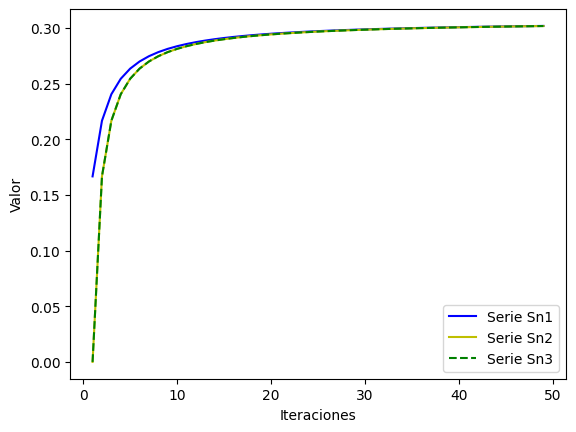

In [77]:
N= np.arange(1,50,1)

Sn1 = np.zeros(len(N))          #Se crea una lista arreglo de ceros para casa
Sn2 = np.zeros(len(N))
Sn3 = np.zeros(len(N))

for i, n in enumerate(N):   #buscamos el valor al que cada serie converge
  Sn1[i] = Sn_1(n)
  Sn2[i] = Sn_2(n)
  Sn3[i] = Sn_3(n)


print(f"La Sn1 converge a {Sn1[48]} con 50 terminos")
print(f"La Sn2 converge a {Sn2[48]} con 50 terminos")
print(f"La Sn3 converge a {Sn3[48]} con 50 terminos")
print("\n")
print("Se puede notar que la Sn2 y la Sn3 están más cercanas que la Sn1,\npor lo que las dos primeras convergen rapidamente a un mismo valor antes que la ultima.")
print("\n")

#plt.figure()
plt.plot(N,Sn1, "b-", label= "Serie Sn1")
plt.plot(N,Sn2, "y-", label= "Serie Sn2")
plt.plot(N,Sn3, "g--", label= "Serie Sn3")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Valor")
plt.show()

 Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

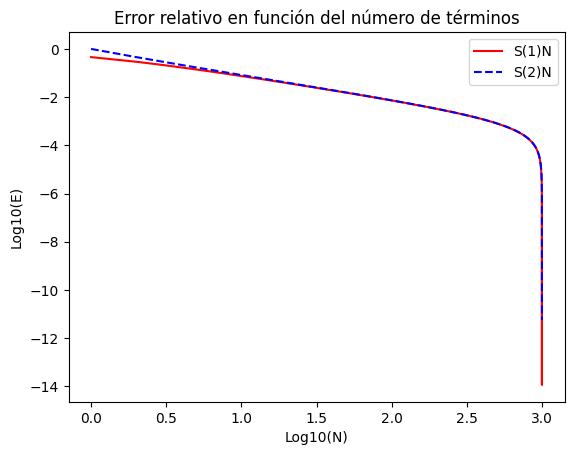

In [79]:
N = 1 * (10)**3      #numeros de sumas a hacer
L1 = []
L2 = []
for i in range(1, N+1):
    E_1 = abs((Sn_1(i) - Sn_3(N)) / Sn_3(N))
    E_2 = abs((Sn_2(i) - Sn_3(N)) / Sn_3(N))
    L1.append(np.log10(E_1))
    L2.append(np.log10(E_2))

LogN = np.log10(np.arange(1, N+1))




plt.plot(LogN, L1,"r-", label="S(1)N")


plt.plot(LogN, L2,"b--", label="S(2)N" )

plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.title('Error relativo en función del número de términos')
plt.legend()
plt.show()